## 1. Data Loading and Preprocessing

After Trying several times in Google Colaboratory etc finally able to execute this model on AWS with the given data. It took about 24 hours for compelte execution.

In [1]:
# import necessary libraries and functions
%matplotlib inline

import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

from keras.layers import Dense
from keras.models import Sequential
from keras.preprocessing import image

from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [2]:
# create random number generator
seed = 42
rng = np.random.RandomState(seed)


In [6]:
# load csv file
data = pd.read_csv('face_recognition/train.csv')


In [7]:
# load images and store it in numpy array
X = []
for img_name in data.image_names:
    img = plt.imread('face_recognition/images/' + img_name)
    X.append(img)
    
X=np.array(X)

# create target
y = data.gender_class.values


In [8]:
# reshape to one single row
X = X.reshape(12196, 224*224*3)


In [9]:
# preprocessing
X = X / X.max()


In [10]:
# set aside validation data
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)


## 2. Model Building

In [11]:
model=Sequential()

model.add(Dense(100, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [12]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 15,053,001
Trainable params: 15,053,001
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))



Train on 8537 samples, validate on 3659 samples
Epoch 1/10
8537/8537 [==============================] - 797s 93ms/step - loss: 0.6860 - acc: 0.6109 - val_loss: 0.8858 - val_acc: 0.4870
Epoch 2/10
8537/8537 [==============================] - 1272s 149ms/step - loss: 0.5908 - acc: 0.6913 - val_loss: 0.7134 - val_acc: 0.5802
Epoch 3/10
8537/8537 [==============================] - 1469s 172ms/step - loss: 0.5674 - acc: 0.7079 - val_loss: 0.5312 - val_acc: 0.7404
Epoch 4/10
8537/8537 [==============================] - 1156s 135ms/step - loss: 0.5514 - acc: 0.7245 - val_loss: 0.5203 - val_acc: 0.7426
Epoch 5/10
8537/8537 [==============================] - 777s 91ms/step - loss: 0.5420 - acc: 0.7284 - val_loss: 0.5199 - val_acc: 0.7480
Epoch 6/10
8537/8537 [==============================] - 838s 98ms/step - loss: 0.5217 - acc: 0.7403 - val_loss: 0.5620 - val_acc: 0.7037
Epoch 7/10
8537/8537 [==============================] - 790s 93ms/step - loss: 0.5140 - acc: 0.7517 - val_loss: 0.4972 - va

8 % sure that it is male
Whereas actual class is  0


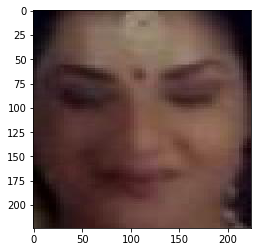

In [44]:
# get predictions
predictions = model.predict_classes(X_valid)[:, 0]
prediction_probabilities = model.predict(X_valid)[:, 0]

# pull out the original images from the data
# which correspond to the validation data
_, valid_male, _, valid_y = train_test_split(data.image_names.values, y, test_size=0.3, random_state=seed)

# get a random index to plot image randomly
index = rng.choice(range(len(valid_male)))

# get the corresponding image name and probability
img_name = valid_male[index]
prob = (prediction_probabilities * 100).astype(int)[index]

# read the image
img = plt.imread('face_recognition/images/' + img_name)

# print probability and actual class
print(prob , '% sure that it is male')
print('Whereas actual class is ', valid_y[index])

# plot image
plt.imshow(img)


In [16]:
incorrect_indices = np.where(predictions != y_valid)[0]


In [17]:
len(incorrect_indices), predictions.shape


(929, (3659,))

79 % sure that it is female
Whereas actual class is  0


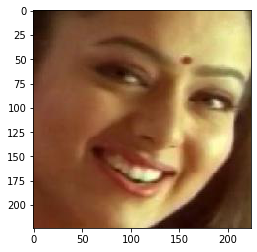

In [46]:
index = rng.choice(incorrect_indices)
img_name = valid_male[index]


prob = (prediction_probabilities * 100).astype(int)[index]

img = plt.imread('face_recognition/images/' + img_name)

print(prob , '% sure that it is female')
print('Whereas actual class is ', y_valid[index])

plt.imshow(img)


## 3. Hyperparameter Tuning

Weights of neural network ----> Parameter

Activation Function ----> HyperParameter

In [19]:
# change activation function of hidden layer
# increase hidden neurons
# increase hidden layers
# increase number of epochs
# change optimizer


In [20]:
# change activation function of hidden layer
model=Sequential()

model.add(Dense(100, input_dim=224*224*3, activation='tanh'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [21]:
model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))


Train on 8537 samples, validate on 3659 samples
Epoch 1/10
8537/8537 [==============================] - 753s 88ms/step - loss: 1.2487 - acc: 0.5366 - val_loss: 0.6698 - val_acc: 0.6772
Epoch 2/10
8537/8537 [==============================] - 921s 108ms/step - loss: 0.6562 - acc: 0.6180 - val_loss: 0.6319 - val_acc: 0.6267
Epoch 3/10
8537/8537 [==============================] - 781s 91ms/step - loss: 0.6199 - acc: 0.6636 - val_loss: 0.5886 - val_acc: 0.6808
Epoch 4/10
8537/8537 [==============================] - 837s 98ms/step - loss: 0.6010 - acc: 0.6814 - val_loss: 0.6192 - val_acc: 0.6606
Epoch 5/10
8537/8537 [==============================] - 779s 91ms/step - loss: 0.5698 - acc: 0.7108 - val_loss: 0.5519 - val_acc: 0.7242
Epoch 6/10
8537/8537 [==============================] - 822s 96ms/step - loss: 0.5518 - acc: 0.7234 - val_loss: 0.7153 - val_acc: 0.5635
Epoch 7/10
8537/8537 [==============================] - 765s 90ms/step - loss: 0.5363 - acc: 0.7356 - val_loss: 0.5144 - val_acc:

In [22]:
# increase hidden neurons
model=Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [23]:
model.fit(X_train, y_train, epochs=10, batch_size=128,validation_data=(X_valid,y_valid))


Train on 8537 samples, validate on 3659 samples
Epoch 1/10
8537/8537 [==============================] - 1875s 220ms/step - loss: 0.8473 - acc: 0.5806 - val_loss: 0.6091 - val_acc: 0.6783
Epoch 2/10
8537/8537 [==============================] - 1245s 146ms/step - loss: 0.6226 - acc: 0.6521 - val_loss: 0.6903 - val_acc: 0.5849
Epoch 3/10
8537/8537 [==============================] - 1104s 129ms/step - loss: 0.6037 - acc: 0.6835 - val_loss: 0.5829 - val_acc: 0.6791
Epoch 4/10
8537/8537 [==============================] - 1241s 145ms/step - loss: 0.5779 - acc: 0.6942 - val_loss: 0.5394 - val_acc: 0.7294
Epoch 5/10
8537/8537 [==============================] - 1064s 125ms/step - loss: 0.5609 - acc: 0.7170 - val_loss: 0.5435 - val_acc: 0.7169
Epoch 6/10
8537/8537 [==============================] - 991s 116ms/step - loss: 0.5495 - acc: 0.7183 - val_loss: 0.5414 - val_acc: 0.7158
Epoch 7/10
8537/8537 [==============================] - 1034s 121ms/step - loss: 0.5485 - acc: 0.7224 - val_loss: 0.511

In [24]:
# increase number of epochs
model=Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [25]:
model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Train on 8537 samples, validate on 3659 samples
Epoch 1/50
8537/8537 [==============================] - 934s 109ms/step - loss: 0.8426 - acc: 0.6038 - val_loss: 0.5940 - val_acc: 0.6972
Epoch 2/50
8537/8537 [==============================] - 915s 107ms/step - loss: 0.6280 - acc: 0.6576 - val_loss: 0.6022 - val_acc: 0.6775
Epoch 3/50
8537/8537 [==============================] - 908s 106ms/step - loss: 0.5867 - acc: 0.6890 - val_loss: 0.5638 - val_acc: 0.7013
Epoch 4/50
8537/8537 [==============================] - 919s 108ms/step - loss: 0.5795 - acc: 0.6998 - val_loss: 0.5997 - val_acc: 0.6578
Epoch 5/50
8537/8537 [==============================] - 991s 116ms/step - loss: 0.5508 - acc: 0.7203 - val_loss: 0.5344 - val_acc: 0.7272
Epoch 6/50
8537/8537 [==============================] - 911s 107ms/step - loss: 0.5582 - acc: 0.7171 - val_loss: 0.5327 - val_acc: 0.7428
Epoch 7/50
8537/8537 [==============================] - 849s 99ms/step - loss: 0.5457 - acc: 0.7299 - val_loss: 0.5234 - val

In [26]:
# increase hidden layers
model=Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [27]:
model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Train on 8537 samples, validate on 3659 samples
Epoch 1/50
8537/8537 [==============================] - 836s 98ms/step - loss: 0.6768 - acc: 0.5750 - val_loss: 0.6565 - val_acc: 0.6704
Epoch 2/50
8537/8537 [==============================] - 827s 97ms/step - loss: 0.6409 - acc: 0.6656 - val_loss: 0.6309 - val_acc: 0.6712
Epoch 3/50
8537/8537 [==============================] - 1504s 176ms/step - loss: 0.6150 - acc: 0.6963 - val_loss: 0.6228 - val_acc: 0.6412
Epoch 4/50
8537/8537 [==============================] - 1005s 118ms/step - loss: 0.5969 - acc: 0.7069 - val_loss: 0.5952 - val_acc: 0.7149
Epoch 5/50
8537/8537 [==============================] - 945s 111ms/step - loss: 0.5799 - acc: 0.7147 - val_loss: 0.5841 - val_acc: 0.7210
Epoch 6/50
8537/8537 [==============================] - 873s 102ms/step - loss: 0.5674 - acc: 0.7209 - val_loss: 0.5648 - val_acc: 0.7212
Epoch 7/50
8537/8537 [==============================] - 865s 101ms/step - loss: 0.5551 - acc: 0.7299 - val_loss: 0.5660 - va

In [28]:
from keras.optimizers import Adam

In [29]:
adam = Adam(lr=1e-5)

In [30]:
# change optimizer
model=Sequential()

model.add(Dense(1024, input_dim=224*224*3, activation='sigmoid'))
model.add(Dense(1024, activation='sigmoid'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

In [31]:
model.fit(X_train, y_train, epochs=50, batch_size=128,validation_data=(X_valid,y_valid))

Train on 8537 samples, validate on 3659 samples
Epoch 1/50
8537/8537 [==============================] - 1547s 181ms/step - loss: 0.6177 - acc: 0.6557 - val_loss: 0.5791 - val_acc: 0.6939
Epoch 2/50
8537/8537 [==============================] - 2186s 256ms/step - loss: 0.5410 - acc: 0.7353 - val_loss: 0.5385 - val_acc: 0.7363
Epoch 3/50
8537/8537 [==============================] - 2553s 299ms/step - loss: 0.5185 - acc: 0.7489 - val_loss: 0.5088 - val_acc: 0.7587
Epoch 4/50
8537/8537 [==============================] - 2360s 276ms/step - loss: 0.5067 - acc: 0.7524 - val_loss: 0.5049 - val_acc: 0.7557
Epoch 5/50
8537/8537 [==============================] - 2208s 259ms/step - loss: 0.4926 - acc: 0.7624 - val_loss: 0.4954 - val_acc: 0.7524
Epoch 6/50
8537/8537 [==============================] - 2423s 284ms/step - loss: 0.4852 - acc: 0.7712 - val_loss: 0.4889 - val_acc: 0.7680
Epoch 7/50
8537/8537 [==============================] - 2457s 288ms/step - loss: 0.4789 - acc: 0.7749 - val_loss: 0.47

In [35]:
#load test data file
test_data = pd.read_csv('face_recognition/test.csv')

In [36]:
# load images and store it in numpy array
test_X = []
for img_name in test_data.image_names:
    test_img = plt.imread('face_recognition/images/' + img_name)
    test_X.append(test_img)
    
test_data=np.array(test_X)


In [37]:
# reshape to one single row
test_data = test_data.reshape(5227, 224*224*3)

In [39]:
# preprocessing
test_data = test_data / test_data.max()

In [40]:
# making predictions
prediction = model.predict_classes(test_data)

In [43]:
# creating submission file
sample = pd.read_csv('face_recognition/sample_submission_yAxnSkN.csv')
sample['class'] = prediction
sample.to_csv('face_recognition/GC_project.csv', header=True, index=False)